In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**EDA on the dataset**

In [8]:
df = pd.read_csv('SuperMarket Analysis.csv')
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


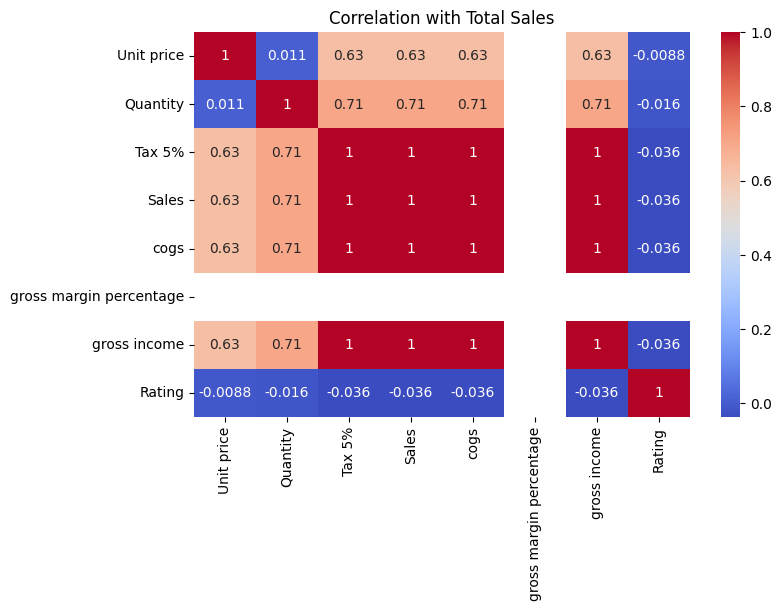

In [ ]:
df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation with Sales")
plt.show()


**Analysis from Heatmap**

Above, we can see there's a strong correlation between sales and unit price, quantity, tax, cogs, gross income and a moderately positive correlation with rating.


In [12]:
df.groupby("Product line")["Sales"].sum().sort_values(ascending=False)


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

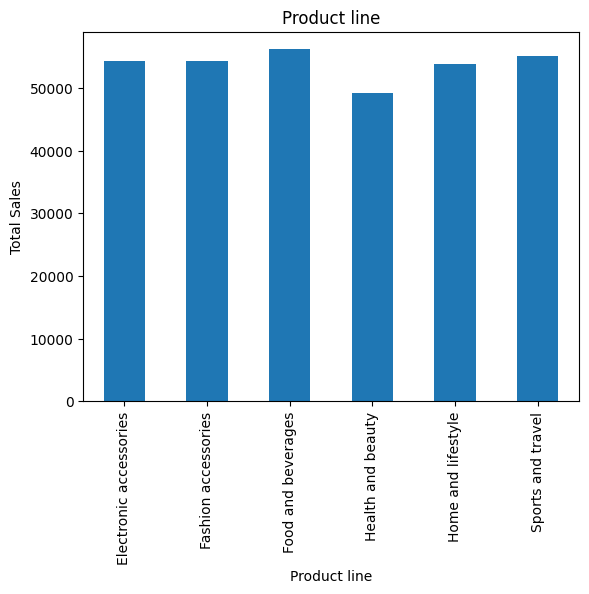

In [13]:
df.groupby("Product line")["Sales"].sum().plot(kind="bar")
plt.ylabel("Total Sales")
plt.title("Product line")
plt.show()


0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Month, Length: 1000, dtype: int32


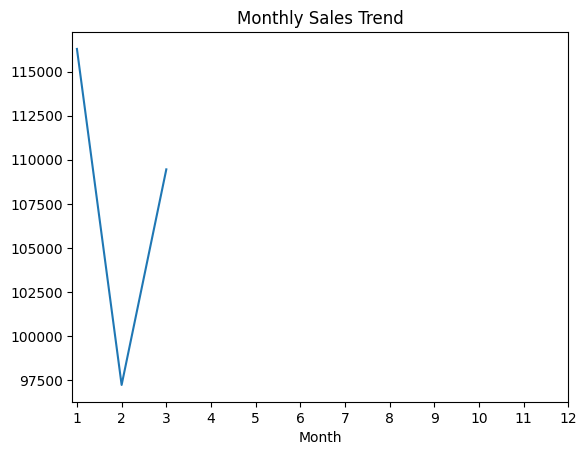

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
print(df["Month"])
df.groupby("Month")["Sales"].sum().plot()
plt.xticks(range(1, 13))  
plt.xlabel("Month")
plt.title("Monthly Sales Trend")
plt.show()


The peak sales month is in January, the first month

C:\Users\onyii\AppData\Local\Temp\ipykernel_6928\2103776206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time_dt"] = pd.to_datetime(df["Time"])


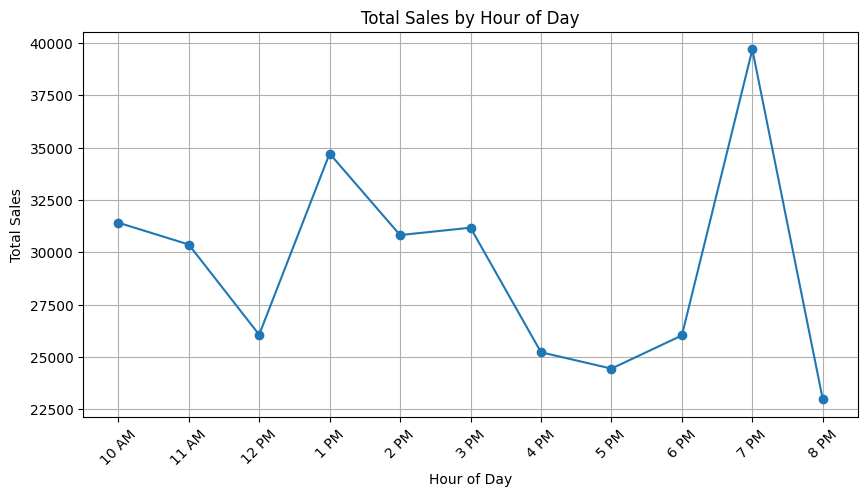

In [ ]:

df["Time_dt"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time_dt"].dt.hour
hourly_sales = df.groupby("Hour")["Sales"].sum()

# Create 12-hour AM/PM labels
labels = [f"{h%12 if h%12!=0 else 12} {'AM' if h<12 else 'PM'}" for h in hourly_sales.index]

# Plot
plt.figure(figsize=(10,5))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o")
plt.xticks(ticks=hourly_sales.index, labels=labels, rotation=45) 
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.title("Total Sales by Hour of Day")
plt.grid(True)
plt.show()



From above we can see the peak hour for sale is 7:00pm and the least time was around 8pm

**Building the machine learning Predictive Model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
# Split data into features (X) and target (y)
X = df[["Unit price", "Quantity", "Tax 5%", "cogs", "gross margin percentage", "gross income"]]
categorical_cols = pd.get_dummies(df[["Gender", "Product line", "Month", "Hour"]], drop_first=True)
X = pd.concat([X, categorical_cols], axis=1)
y = df["Sales"]

In [105]:
X

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Month,Hour,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,74.69,7,26.1415,522.83,4.761905,26.1415,1,13,False,False,False,True,False,False
1,15.28,5,3.8200,76.40,4.761905,3.8200,3,10,False,False,False,False,False,False
2,46.33,7,16.2155,324.31,4.761905,16.2155,3,13,False,False,False,False,True,False
3,58.22,8,23.2880,465.76,4.761905,23.2880,1,20,False,False,False,True,False,False
4,86.31,7,30.2085,604.17,4.761905,30.2085,2,10,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,40.35,4.761905,2.0175,1,13,True,False,False,True,False,False
996,97.38,10,48.6900,973.80,4.761905,48.6900,3,17,False,False,False,False,True,False
997,31.84,1,1.5920,31.84,4.761905,1.5920,2,13,True,False,True,False,False,False
998,65.82,1,3.2910,65.82,4.761905,3.2910,2,15,True,False,False,False,True,False


In [106]:
y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Sales, Length: 1000, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 14) (200, 14) (800,) (200,)


In [108]:
y_train

29      235.2105
535     122.5245
695     458.6925
557    1034.4600
836     202.3350
         ...    
106     172.4940
270     354.0075
860      90.5835
435     937.8180
102     218.0115
Name: Sales, Length: 800, dtype: float64

In [109]:
y_test

521    523.9710
737    616.9800
740    408.7335
660    135.3555
411     45.9270
         ...   
408    237.4260
332    404.3550
208     95.6655
613     84.9765
78     822.2550
Name: Sales, Length: 200, dtype: float64

In [110]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([523.971 , 616.98  , 408.7335, 135.3555,  45.927 , 618.975 ,
       127.827 , 731.6925, 450.1035, 138.1275, 422.73  , 463.428 ,
       212.7825, 252.252 , 290.0835, 331.128 , 587.664 , 216.846 ,
       757.365 , 185.094 , 416.178 , 166.236 , 128.016 , 125.706 ,
       247.8735, 195.594 , 742.2975,  30.996 , 145.5825,  56.469 ,
        75.5475, 609.    ,  96.1905, 432.768 , 193.011 , 174.3   ,
       667.38  , 198.639 , 193.074 , 192.843 , 214.746 , 922.635 ,
        74.7075, 180.873 ,  93.0405, 400.764 , 221.886 ,  68.2395,
       343.224 , 281.169 , 430.71  , 101.64  ,  69.09  , 269.934 ,
       181.44  , 494.1825, 461.5275,  60.816 , 456.288 , 222.138 ,
       121.128 ,  33.936 ,  84.756 , 942.4485, 381.3915, 510.615 ,
       370.125 , 760.452 , 939.54  , 118.251 , 391.419 , 127.26  ,
       293.139 ,  89.0715,  65.604 , 697.368 , 764.19  , 253.008 ,
        76.755 , 745.836 , 305.55  ,  70.287 , 352.5795, 614.943 ,
       218.0745, 270.585 ,  69.111 , 829.08  , 384.72  , 395.8

In [112]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error
}

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    linear_score = func(y_test, linear_predictions)

    # Store results in the dictionary
    results[name] = {
        "Linear Regression": linear_score
    }

In [71]:
results

{'Mean Absolute Error': {'Linear Regression': 8.30180368893707e-14},
 'Mean Squared Error': {'Linear Regression': 1.1395395543061499e-26}}